<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Test de parametros </font>
</div>

- **Para**: IFTA

- **Fecha**: 2021/11/25
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
   

- **Objetivos**: Analizar los parámetros de comparación entre intensidad y target



# Código

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import um, mm, nm, np, sp, plt, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.utils_drawing import draw_several_fields

from py_aocg.ifta.algorithms import GS_Fresnel_algorithm_deprecated, GS_scalar_far
from py_aocg.ifta.parameters import verify_mask, make_binary, RMSE

number of processors: 8
total memory        : 15.5 Gb
available memory    : 55 %
max frequency       : 3100 GHz
py_aocg
number of processors: 8
total memory        : 15.5 Gb
available memory    : 55 %
max frequency       : 3100 GHz


## Mask a

In [3]:
num_x=128
num_y=128
DOE_size=40*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

In [4]:
source=Scalar_source_XY(x,y,wavelength)
source.plane_wave()



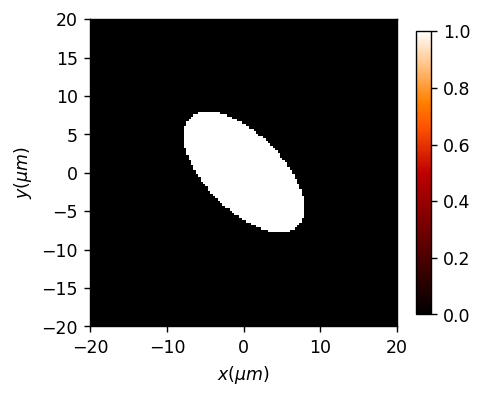

In [5]:
target=Scalar_mask_XY(x,y,wavelength)
target.circle(r0=(0,0), radius=(5,10), angle=45*degrees)
target.draw(has_colorbar='vertical');

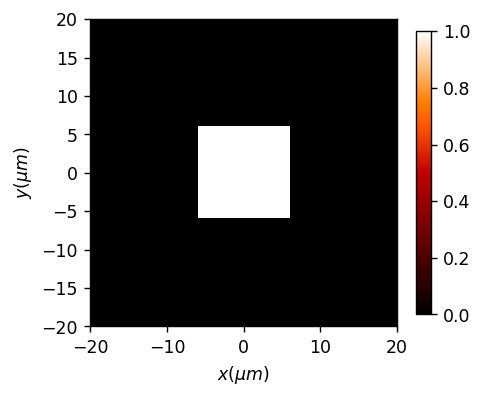

In [278]:
wyrowsky=Scalar_mask_XY(x,y,wavelength)
wyrowsky.square(r0=(0,0), size=(12,12), angle=0*degrees)

wyrowsky.draw(has_colorbar='vertical');

I_wyrowsky = wyrowsky.intensity()

## Campo cercano

### Direct propagation

In [279]:
z_distance=15*um

Good result: factor 1.60


(<Figure size 500x500 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f7bdf01a4c0>)

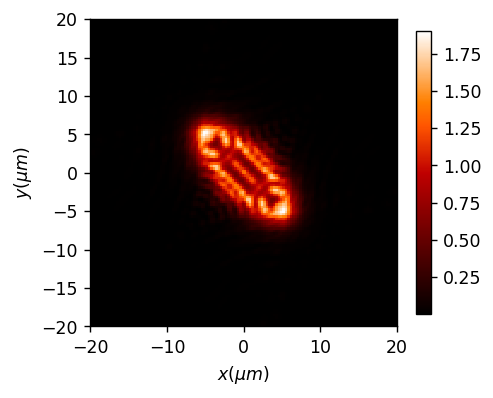

In [280]:
u_direct = target.RS(z=z_distance, verbose=True)
u_direct.draw(has_colorbar='vertical')

### Computation - continuous

In [296]:
num_steps=150

DOE_proposal_n, mask_proposal_n, errors_proposal_n = GS_scalar_far(None,target, kind='phase', is_binary=False, rmse='fast', mask_wyrowsky = 1,
                                                                      num_steps=num_steps, has_draw=False);


DOE_proposal_y, mask_proposal_y, errors_proposal_y = GS_scalar_far(None,target, kind='phase', is_binary=False, rmse='fast', mask_wyrowsky = wyrowsky.intensity(),
                                                                      num_steps=num_steps, has_draw=False)

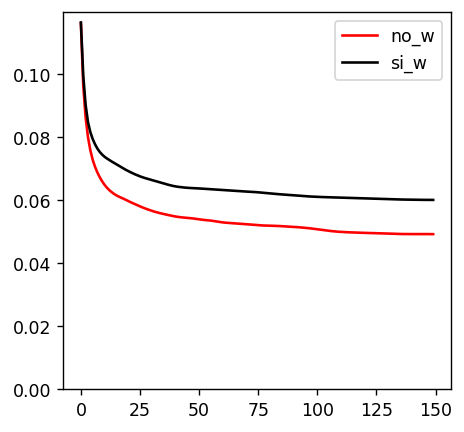

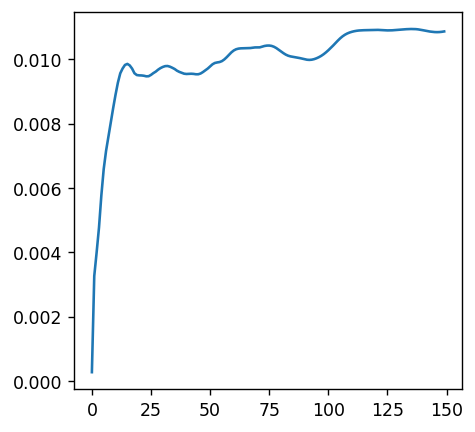

In [297]:
plt.plot(errors_proposal_n,'r', label='no_w')
plt.plot(errors_proposal_y,'k', label='si_w')
plt.legend()
plt.ylim(ymin=0)

plt.figure()
plt.plot(errors_proposal_y-errors_proposal_n)


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f7be416b490>)

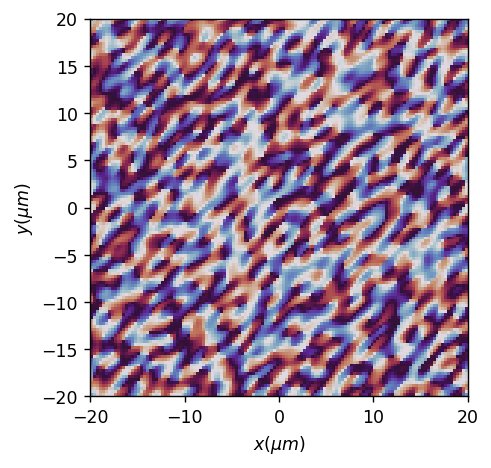

In [298]:
DOE_proposal.draw('phase')

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f7bdf092100>)

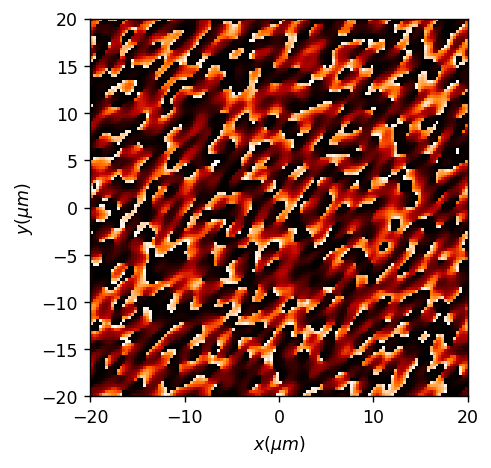

In [299]:
mask_proposal.draw()

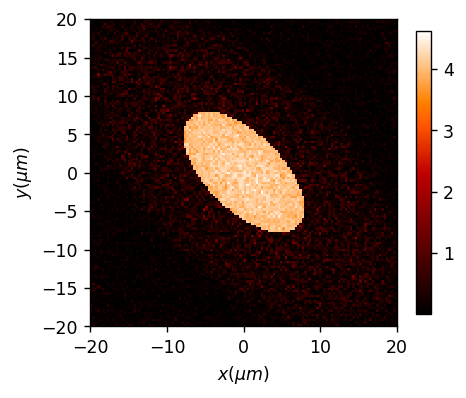

In [300]:
u_final_n = DOE_proposal_n.fft(z=0, new_field=True, remove0=False)
u_final_n.normalize()
u_final_n.draw(has_colorbar='vertical', logarithm=1e2);

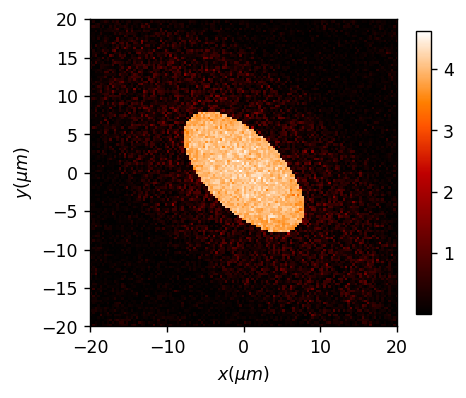

In [301]:
u_final_y = DOE_proposal_y.fft(z=0, new_field=True, remove0=False)
u_final_y.normalize()
u_final_y.draw(has_colorbar='vertical', logarithm=1e2);

In [302]:
I_field_y=u_final_y.intensity()
I_field_n=u_final_n.intensity()
I_target=target.intensity()

In [303]:
rmse, factor_y = RMSE(I_field_y, I_target, fast=True)
rmse_0, factor_n = RMSE(I_field_n, I_target, fast=True)

rmse_up, _ = RMSE(I_field_y, I_target, where='up', fast=True)
rmse_0_up, _ = RMSE(I_field_n, I_target,  where='up',fast=True)

rmse_down, _ = RMSE(I_field_y, I_target, where='down', fast=True)
rmse_0_down, _ = RMSE(I_field_n, I_target, where='down', fast=True)

factor_0 = I_target.sum()/I_field.sum()
print(factor_y, factor_n)

1.7391285018012175 1.6291204585469325


In [304]:
print(rmse_up, rmse_down, rmse )
print(rmse_0_up, rmse_0_down, rmse_0)


0.19087646628611374 0.010532708171675528 0.0600776290278439
0.15641329222430586 0.008542563685718797 0.04921653632659852


0.04921653632659852 0.0600776290278439 0.04921653632659852 0.05963153575644143


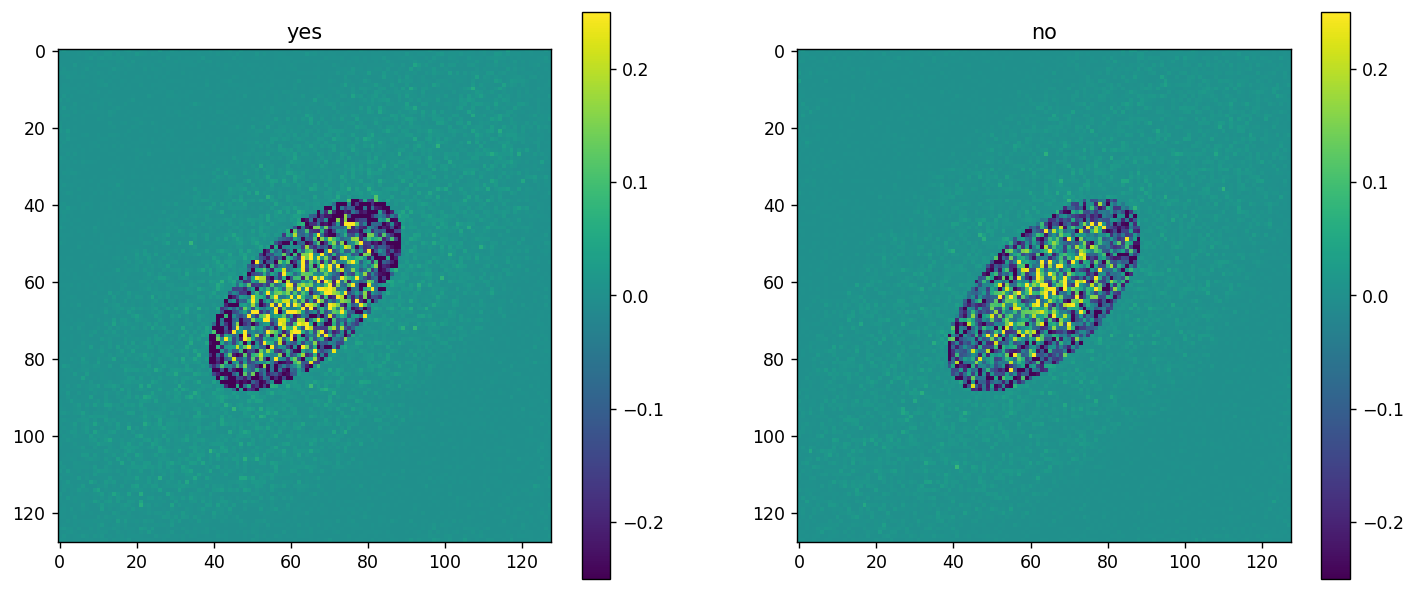

In [305]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(factor_y*I_field_y - I_target )
plt.colorbar()
plt.clim(-.25,.25)
plt.title('yes')

plt.subplot(1,2,2)

plt.imshow(factor_n*I_field_n - I_target )
plt.clim(-.25,.25)
plt.colorbar()
plt.title('no')



error_n=np.sqrt(((factor_n*I_field_n - I_target)**2).mean())
rmse_n, _=RMSE(I_field_n,I_target,fast=True)

error_y=np.sqrt(((factor_y*I_field_y - I_target)**2).mean())
rmse_y, _=RMSE(I_field_y,I_target,fast=False)

print(error_n, error_y, rmse_n, rmse_y)


## STD

Para que el parámetro sea estándar, habrá que normalizar respecto al target, 
no se si meterlo dentro

In [306]:
from py_aocg.ifta.parameters import standard_deviation

In [307]:
std_up=standard_deviation(I_field_y, I_target, where='up', wyrowsky_mask=wyrowsky.intensity(), normalize=True)
std_down=standard_deviation(I_field_y, I_target, where='down', wyrowsky_mask=wyrowsky.intensity(), normalize=True)
std_all=standard_deviation(I_field_y, I_target, where='all', wyrowsky_mask=wyrowsky.intensity(), normalize=True)

In [308]:
print(std_up, std_down, std_all)

0.6097289036500556 0.0031191729557578964 0.3497533669220137


In [309]:
std_up=standard_deviation(I_field_n, I_target, where='up', wyrowsky_mask=wyrowsky.intensity(), normalize=True)
std_down=standard_deviation(I_field_n, I_target, where='down', wyrowsky_mask=wyrowsky.intensity(), normalize=True)
std_all=standard_deviation(I_field_n, I_target, where='all', wyrowsky_mask=wyrowsky.intensity(), normalize=True)

In [295]:
print(std_up, std_down, std_all)

0.6039283596116211 0.0021931864675788938 0.34899337912517664
